In [ ]:
# Ch04-2-PCA 

In [1]:
# Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load Breast Cancer dataset
bc_data = load_breast_cancer()
X = bc_data.data  # Features
y = bc_data.target  # Target labels (0 = malignant, 1 = benign)

In [3]:
# Standardize the data so that mean = 0 & variance = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Perform PCA with 3 components
bc_pca = PCA(n_components=3)
X_bc_pca = bc_pca.fit_transform(X_scaled)

In [5]:
# Load ther results into a dataframe
bc_pca_df = pd.DataFrame(X_bc_pca, columns=['PC1', 'PC2', 'PC3'])
bc_pca_df['label'] = y

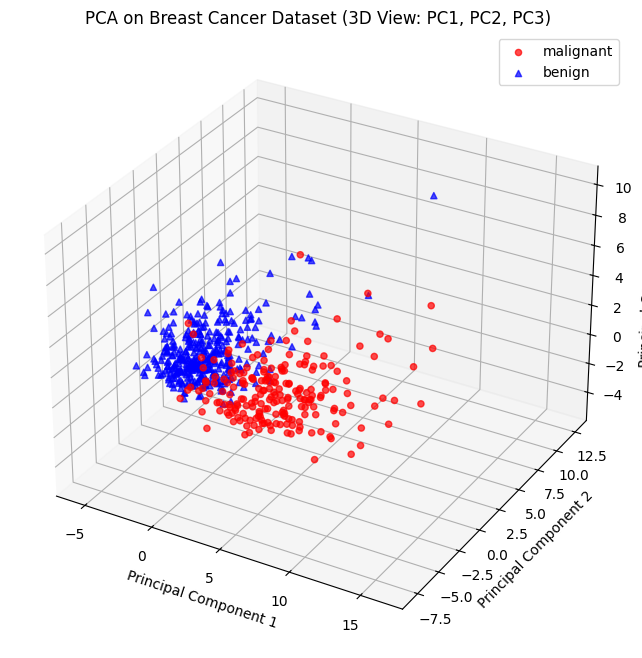

In [7]:
# 3D Scatter Plot for PC1, PC2, and PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Loop to create the 3 axes
for label, color, marker in zip([0, 1], ['red', 'blue'], ['o', '^']):
    subset = bc_pca_df[bc_pca_df['label'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=bc_data.target_names[label], marker=marker, alpha=0.7)
# end for
ax.set_title('PCA on Breast Cancer Dataset (3D View: PC1, PC2, PC3)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [8]:
# Get the explained variance ratio
explained_variance = bc_pca.explained_variance_ratio_

# Print explained variance for each component
for i, variance in enumerate(explained_variance, 1):
    print(f"Explained variance for PC{i}: {variance:.2f}")

# Print cumulative explained variance
cumulative_variance = explained_variance.sum()
print(f"Total variance explained by the first 3 components: {cumulative_variance:.2f}")

Explained variance for PC1: 0.44
Explained variance for PC2: 0.19
Explained variance for PC3: 0.09
Total variance explained by the first 3 components: 0.73


In [ ]:
# Plot cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
## End of Notebook ##